### Basic Introduction

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.


<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>

**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner

**Published in**: Proceedings of the IEEE (1998)

### Structure of the LeNet network

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.

![lenet](https://www.researchgate.net/profile/Gabriel_Falcao/publication/321665783/figure/fig2/AS:635289152282624@1528476145313/The-architecture-of-LeNet-5-23-a-CNN-used-for-digits-recognition-for-the-MNIST-dataset.png)


LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons.


**Summary**


* LeNet-5 is a very efficient convolutional neural network for handwritten character recognition.
* Convolutional neural networks can make good use of the structural information of images.
* The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights.




In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Building the Model Architecture

model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

>> NOTE: Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. 

In [2]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3321 - accuracy: 0.8990 - val_loss: 0.0951 - val_accuracy: 0.9685
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0879 - accuracy: 0.9736 - val_loss: 0.0625 - val_accuracy: 0.9778
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0467 - val_accuracy: 0.9841
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0441 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0392 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0348 - val_accuracy: 0.9882

In [3]:
model.predict(x_test[[0]])

array([[1.3893278e-07, 4.8195693e-06, 9.9318051e-08, 4.7309413e-06,
        1.3580024e-07, 8.7314208e-07, 4.9583494e-11, 9.9998903e-01,
        1.9626539e-08, 9.3095004e-08]], dtype=float32)

In [4]:
import matplotlib.pyplot as plt

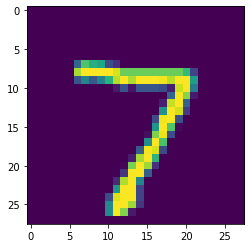

In [5]:
plt.imshow(x_test[0])

In [6]:
import numpy as np
pred = model.predict(x_test[[0]])
np.argmax(pred)

7

---

In [9]:
### Credits https://github.com/scrambledpie/Drawing-Mnist-and-Cifarizing-image-files/blob/master/DrawMyOwnNumbers.ipynb

from tkinter import *
import time
from PIL import Image, ImageDraw
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# This function takes 2 arguments, 
#   - an optional keras model,
#   - Canvas Width allows user to set the pixel height and width of the drawing box
#
#  The function returns a 28*28 matrix of  pixel values made from the canvas drawing
#  if a keras model is also provided then the function will plot prediction results too

def DrawMyOwnNumbers(Kerasmodel=None,CanvasWidth=200):
    DrawnOutMatrix=0
    width=CanvasWidth
    white = (255, 255, 255)
    black = (0, 0, 0)

    b1 = "up"
    xold, yold = None, None    

    def b1down(event):
        nonlocal b1
        b1 = "down"           

    def b1up(event):
        nonlocal b1, xold, yold
        b1 = "up"
        xold = None
        yold = None
    def motion(event):
            if b1 == "down":
                nonlocal xold, yold
                if xold is not None and yold is not None:
                    event.widget.create_line(xold,yold,event.x,event.y)
                    draw.line([xold,yold,event.x,event.y], black)
                xold = event.x
                yold = event.y
    root = Tk()

    drawing_area = Canvas(root,width=width,height=width)
    image1 = Image.new("RGB", (width, width), white)
    draw = ImageDraw.Draw(image1)
    drawing_area.pack()
    drawing_area.bind("<Motion>", motion)
    drawing_area.bind("<ButtonPress-1>", b1down)
    drawing_area.bind("<ButtonRelease-1>", b1up)
    
    def handle_click():
        nonlocal DrawnOutMatrix
        nonlocal root
        root.destroy()
        %matplotlib inline


        filename = "4my_drawing.bmp"
        image1.save(filename)
        II=np.asarray(mpimg.imread(filename))
        II=np.apply_along_axis(np.min,2,II)
        

        data=np.asarray([[i,j] for i in range(width) for j in range(width) if II[j,i]==0]).astype('float64')
        datax=data[:,0]
        datay=data[:,1]
        
        # centre and scale the pixels
        datax -= np.mean(datax)
        datay -= np.mean(datay)
        scaling = np.max(np.abs([datax.min(),datax.max(),datay.min(),datay.max()]))
        datax *= 1/scaling
        datay *= 1/scaling
      
        posn = np.linspace(-1.2,1.2, 28)
        sx = -0.5*(1/0.06)**2
        def kde(x,y):
            return(np.min([np.sum(np.exp(sx*((x-datax)**2+(y-datay)**2))),5]))

        output=np.asarray([[kde(x,y) for x in posn] for y in posn])
        output=output/output.max()
        output1=np.asarray([[[ [output[j,i]] for i in np.arange(28)] for j in np.arange(28)]])
        DrawnOutMatrix=output1[0,:,:,0]
        
        if Kerasmodel:
            p= Kerasmodel.predict_proba(output1,verbose=1==2)[0]

            f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
            ax1.imshow(255-II,cmap='Greys')

            def PlotMnist(inn,ax):
                ax.imshow(inn[0,:,:,0],cmap='Greys')

            PlotMnist(output1,ax2)
            ax3.bar(np.arange(10),p,0.8,color='g')


    Button(root, text='classify!', command=handle_click).pack()
    root.mainloop()
    return DrawnOutMatrix


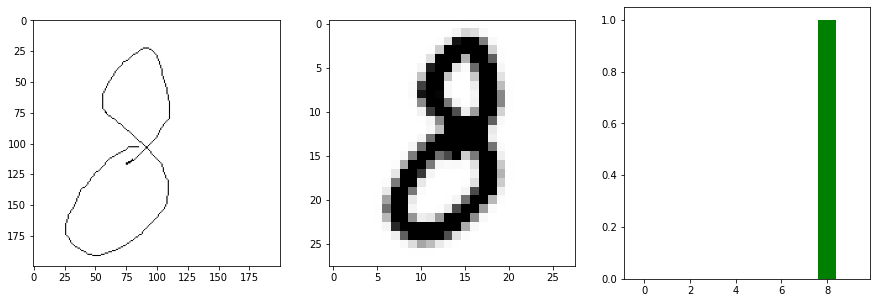

In [10]:
A=DrawMyOwnNumbers(model)